In [ ]:
# IMPORTANT
# use bar chart and assign two axis

In [199]:
# Import Pandas package
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import datetime

In [185]:
origin = pd.read_csv('archive/steam.csv')

In [186]:
origin.isnull().sum()

appid               0
name                0
release_date        0
english             0
developer           0
publisher           0
platforms           0
required_age        0
categories          0
genres              0
steamspy_tags       0
achievements        0
positive_ratings    0
negative_ratings    0
average_playtime    0
median_playtime     0
owners              0
price               0
dtype: int64

In [189]:
# game.dropna(subset=['Year_of_Release', 'Genre'], inplace=True)
game = origin.copy()
game.head()

,appid,name,release_date,english,developer,publisher,platforms,required_age,categories,genres,steamspy_tags,achievements,positive_ratings,negative_ratings,average_playtime,median_playtime,owners,price
0,10,Counter-Strike,2000-11-01,1,Valve,Valve,windows;mac;linux,0,Multi-player;Online Multi-Player;Local Multi-P...,Action,Action;FPS;Multiplayer,0,124534,3339,17612,317,10000000-20000000,7.19
1,20,Team Fortress Classic,1999-04-01,1,Valve,Valve,windows;mac;linux,0,Multi-player;Online Multi-Player;Local Multi-P...,Action,Action;FPS;Multiplayer,0,3318,633,277,62,5000000-10000000,3.99
2,30,Day of Defeat,2003-05-01,1,Valve,Valve,windows;mac;linux,0,Multi-player;Valve Anti-Cheat enabled,Action,FPS;World War II;Multiplayer,0,3416,398,187,34,5000000-10000000,3.99
3,40,Deathmatch Classic,2001-06-01,1,Valve,Valve,windows;mac;linux,0,Multi-player;Online Multi-Player;Local Multi-P...,Action,Action;FPS;Multiplayer,0,1273,267,258,184,5000000-10000000,3.99
4,50,Half-Life: Opposing Force,1999-11-01,1,Gearbox Software,Valve,windows;mac;linux,0,Single-player;Multi-player;Valve Anti-Cheat en...,Action,FPS;Action;Sci-fi,0,5250,288,624,415,5000000-10000000,3.99


In [190]:
# get Genre and Price > 0 
game = game[(game['genres'].str.contains('Indie') & (game['price'] > 0))]
game[['name', 'genres', 'owners', 'price']].head()

,name,genres,owners,price
26,Rag Doll Kung Fu,Indie,20000-50000,5.99
30,Darwinia,Indie;Strategy,500000-1000000,7.19
31,Uplink,Indie;Strategy,500000-1000000,6.99
32,DEFCON,Indie;Strategy,500000-1000000,7.19
33,Multiwinia,Indie,500000-1000000,7.19


In [245]:
# pd.DatetimeIndex(game['release_date']).year[0] == np.int64('2005')
# FILTER BASED ON RELEASE DATE AND AVERAGE PLAYTIME
filterDate = game[pd.DatetimeIndex(game['release_date']).year == np.int64('2005')].sort_values(by='average_playtime', ascending=False).reset_index()
filterDate

,index,appid,name,release_date,english,developer,publisher,platforms,required_age,categories,genres,steamspy_tags,achievements,positive_ratings,negative_ratings,average_playtime,median_playtime,owners,price
0,30,1500,Darwinia,2005-07-14,1,Introversion Software,Introversion Software,windows;mac;linux,0,Single-player,Indie;Strategy,Strategy;Indie;RTS,0,472,158,182,273,500000-1000000,7.19
1,26,1002,Rag Doll Kung Fu,2005-10-12,1,Mark Healey,Mark Healey,windows,0,Single-player;Multi-player,Indie,Indie;Fighting;Multiplayer,0,40,17,0,0,20000-50000,5.99


In [265]:
# GET THE DIFFERENCE BETWEEN POSITIVE AND NEGATIVE RATINGS
filterDate['difference_ratings'] = filterDate['positive_ratings'] - filterDate['negative_ratings']

In [275]:
# FILTER THE DATA FROM NEGATIVE DIFFERENCE
filterDate = filterDate[filterDate['difference_ratings'] > 0]

<BarContainer object of 2 artists>

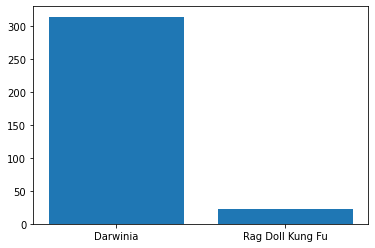

In [279]:
plt.bar(x=filterDate['name'].head(10), height=filterDate['difference_ratings'].head(10))

,index,appid,name,release_date,english,developer,publisher,platforms,required_age,categories,genres,steamspy_tags,achievements,positive_ratings,negative_ratings,average_playtime,median_playtime,owners,price,difference_ratings
0,30,1500,Darwinia,2005-07-14,1,Introversion Software,Introversion Software,windows;mac;linux,0,Single-player,Indie;Strategy,Strategy;Indie;RTS,0,472,158,182,273,500000-1000000,7.19,314
1,26,1002,Rag Doll Kung Fu,2005-10-12,1,Mark Healey,Mark Healey,windows,0,Single-player;Multi-player,Indie,Indie;Fighting;Multiplayer,0,40,17,0,0,20000-50000,5.99,23


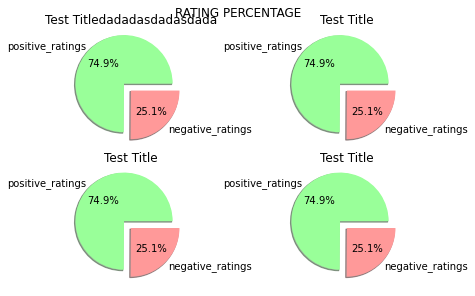

In [443]:
display(filterDate.head())

# plt.bar(x=filterDate['name'].head(10), height=filterDate['difference_ratings'].head(10))
data = ([filterDate.iloc[0,13], filterDate.iloc[0,14]])
dataLabels = ['positive_ratings', 'negative_ratings']
myexplode = [0.2, 0]
color = ['#99ff99', '#ff9999']

# plt.figure(0)
plt.suptitle("RATING PERCENTAGE")

plt.subplot(2,2,1)
#the figure has 1 row, 2 columns, and this plot is the first plot.
plt.pie(data, labels= dataLabels, explode=myexplode, shadow=True, colors=color, autopct='%.1f%%');
plt.title('Test Titledadadasdadasdada')

plt.subplot(2,2,2)
#the figure has 1 row, 2 columns, and this plot is the first plot.
plt.pie(data, labels= dataLabels, explode=myexplode, shadow=True, colors=color, autopct='%.1f%%');
plt.title('Test Title')

# plt.figure(1)
plt.subplot(2,2,3)
#the figure has 1 row, 2 columns, and this plot is the first plot.
plt.pie(data, labels= dataLabels, explode=myexplode, shadow=True, colors=color, autopct='%.1f%%');
plt.title('Test Title')

plt.subplot(2,2,4)
#the figure has 1 row, 2 columns, and this plot is the first plot.
plt.pie(data, labels= dataLabels, explode=myexplode, shadow=True, colors=color, autopct='%.1f%%');
plt.title('Test Title')

plt.tight_layout(pad= 0) # to adjust padding

plt.show()

In [437]:
filterDate.head()

,index,appid,name,release_date,english,developer,publisher,platforms,required_age,categories,genres,steamspy_tags,achievements,positive_ratings,negative_ratings,average_playtime,median_playtime,owners,price,difference_ratings
0,30,1500,Darwinia,2005-07-14,1,Introversion Software,Introversion Software,windows;mac;linux,0,Single-player,Indie;Strategy,Strategy;Indie;RTS,0,472,158,182,273,500000-1000000,7.19,314
1,26,1002,Rag Doll Kung Fu,2005-10-12,1,Mark Healey,Mark Healey,windows,0,Single-player;Multi-player,Indie,Indie;Fighting;Multiplayer,0,40,17,0,0,20000-50000,5.99,23


<BarContainer object of 2 artists>

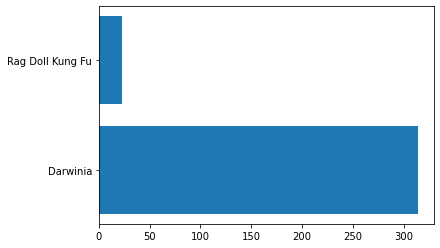

In [412]:
plt.barh(y=filterDate['name'].head(10), width=filterDate['difference_ratings'].head(10))

<BarContainer object of 10 artists>

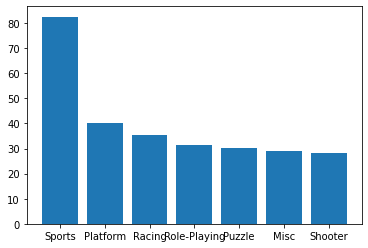

In [128]:
# plt.bar(x=game['Genre'].head(10), height=game['Global_Sales'].head(10))

In [372]:
length =10
p = 1
for i in range(length):
    p+=1
    print(i)
print("p", p)

0
1
2
3
4
5
6
7
8
9
p 11


In [390]:
filterDate.columns.get_loc('positive_ratings')

13

In [397]:
int(7/2)

3